<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Исходные данные
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Функция для аугментации данных (дублирование)
def augment_data(X, y, factor):
    new_X = np.repeat(X, factor, axis=0)
    new_y = np.repeat(y, factor)
    return new_X, new_y

# Увеличиваем датасет в 5 раз
X_aug, y_aug = augment_data(X, y, 5)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.25)

# Создание и обучение модели Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

print(X_test[0])
print(model.predict(X_test[0:1]))

Accuracy: 1.0
[0 1]
[1]


In [341]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Исходные данные
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Функция для аугментации данных (дублирование)
def augment_data(X, y, factor):
    new_X = np.repeat(X, factor, axis=0)
    new_y = np.repeat(y, factor)
    return new_X, new_y

# Увеличиваем датасет в 5 раз
X_aug, y_aug = augment_data(X, y, 5)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.25)

# Создание и обучение модели Дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

print(X_test[0])
print(model.predict(X_test[0:1]))

Accuracy: 1.0
[0 1]
[1]


In [340]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Исходные данные
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Функция для аугментации данных (дублирование)
def augment_data(X, y, factor):
    new_X = np.repeat(X, factor, axis=0)
    new_y = np.repeat(y, factor)
    return new_X, new_y

# Увеличиваем датасет в 5 раз
X_aug, y_aug = augment_data(X, y, 5)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_aug, y_aug, test_size=0.25)

# Создание и обучение модели k-NN
model = KNeighborsClassifier(n_neighbors=3)  # Выбираем 3 ближайших соседа
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

print(X_test[0])
print(model.predict(X_test[0:1]))

Accuracy: 1.0
[0 1]
[1]


In [342]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import xgboost as xgb


max_path_length = 9
center = (4, 4)
number_of_maps = 2000

def generate_map():
    game_map = [[0 for _ in range(max_path_length)] for _ in range(max_path_length)]
    game_map[center[0]][center[1]] = 2
    while True:
        x, y = random.randint(0, max_path_length-1), random.randint(0, max_path_length-1)
        if (x, y) != center:
            game_map[x][y] = 1
            break
    return game_map, (x, y)

def find_path(start, goal):
    path = []
    x, y = start
    gx, gy = goal

    while (x, y) != (gx, gy):
        if x < gx:
            path.append([1, 0, 0, 0, 0])
            x += 1
        elif x > gx:
            path.append([0, 1, 0, 0, 0])
            x -= 1

        if y < gy:
            path.append([0, 0, 1, 0, 0])
            y += 1
        elif y > gy:
            path.append([0, 0, 0, 1, 0])
            y -= 1

    return path

maps = []
paths = []

for _ in range(number_of_maps):
    game_map, goal = generate_map()
    maps.append(game_map)
    path = find_path(center, goal)
    paths.append(path)

for i in range(len(paths)):
    while len(paths[i]) < max_path_length:
        paths[i].append([0, 0, 0, 0, 1])


X = np.array(maps)
X = X.reshape(number_of_maps, max_path_length * max_path_length)
y = np.array(paths)
y = y.reshape(number_of_maps, max_path_length * 5)

print(X.shape)
print(y.shape)

# model = RandomForestClassifier(n_estimators=10, random_state=42)
# model = DecisionTreeClassifier(random_state=42)
# model = KNeighborsClassifier(n_neighbors=3)
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


model.fit(X, y)

y_pred = model.predict(X)

# Вычисление метрик
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred, zero_division=False)
confusion = confusion_matrix(y.argmax(axis=1), y_pred.argmax(axis=1))

print(f"Точность: {accuracy}")
print("Отчет о классификации:")
print(report)
print("Матрица путаницы:")
print(confusion)

(2000, 81)
(2000, 45)
Точность: 1.0
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       886
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       102
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00        86
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00       873
           8       1.00      1.00      1.00       870
           9       1.00      1.00      1.00        94
          10       1.00      1.00      1.00       679
          11       1.00      1.00      1.00       654
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       199
          14       1.00      1.00      1.00       288
          15       1.00      1.00      1.00       127
          16       1.0

In [343]:
new_map = generate_map()[0]

print("Новая карта:")
for row in new_map:
    print(row)

my_map = np.array(new_map)
my_map = my_map.reshape(-1)
prediction = model.predict([my_map])[0]

print(f"Предсказание:")
for i in range(0, len(prediction), 5):
    if i + 4 < len(prediction):
        chunk = [prediction[i], prediction[i + 1], prediction[i + 2], prediction[i + 3], prediction[i + 4]]
        if chunk == [1, 0, 0, 0, 0]:
            print("Назад")
        elif chunk == [0, 1, 0, 0, 0]:
            print("Вперед")
        elif chunk == [0, 0, 1, 0, 0]:
            print("Направо")
        elif chunk == [0, 0, 0, 1, 0]:
            print("Налево")

Новая карта:
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
Предсказание:
Налево
Налево
Налево


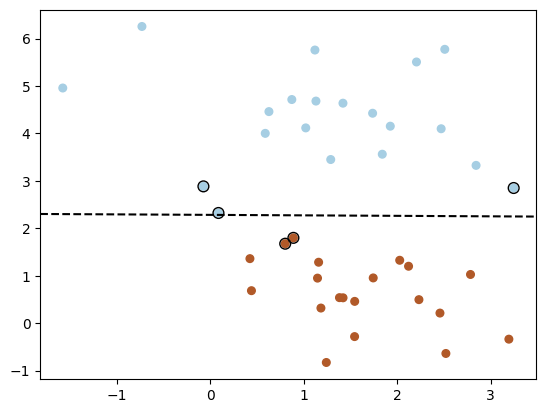

In [344]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Генерация случайных данных для демонстрации
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

# Создание и обучение модели SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Визуализация результатов
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Строим разделяющую гиперплоскость
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Создаем сетку для отображения разделяющей гиперплоскости
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Отрисовка контуров и разделяющей гиперплоскости
ax.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=60, facecolors='none', edgecolors='k')
plt.show()

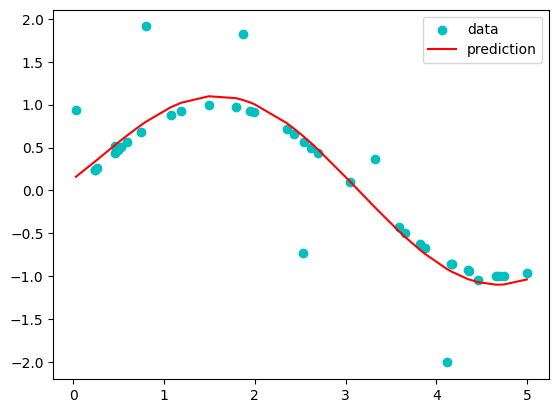

In [345]:
from sklearn.svm import SVR
import numpy as np

# Генерация случайных данных для регрессии
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Добавим немного шума
y[::5] += 3 * (0.5 - np.random.rand(8))

# Создаем и обучаем модель SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X, y)

# Предсказываем значения
y_pred = svr.predict(X)

# Визуализация результатов
plt.scatter(X, y, color='c', label='data')
plt.plot(X, y_pred, color='r', label='prediction')
plt.legend()
plt.show()

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9480
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9576 
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9430 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9324 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9030 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9258 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9853 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9153 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9510 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9317 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


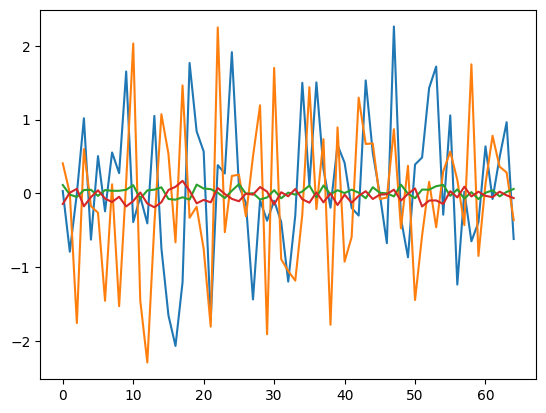

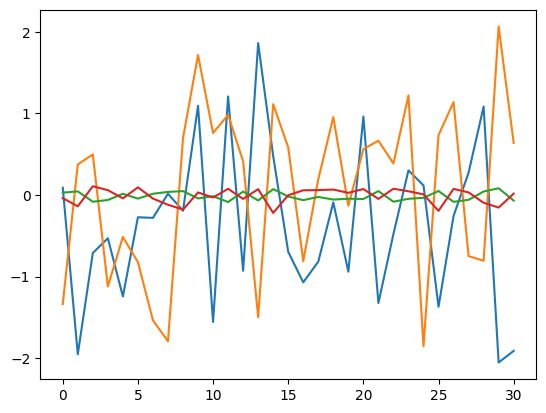

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

# Генерация синтетических данных (двумерный временной ряд)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# Создаем случайный двумерный временной ряд
np.random.seed(7)
dataframe = pd.DataFrame(np.random.randn(100, 2), columns=['x', 'y'])
dataset = dataframe.values
dataset = dataset.astype('float32')

# Разделяем данные на обучающую и тестовую выборки
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Преобразуем данные в формат, подходящий для LSTM
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Реформируем данные в формат, ожидаемый LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

# Создаем и обучаем модель LSTM
model = Sequential()
model.add(Input(shape=(look_back, 2)))
model.add(LSTM(4))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, verbose=1)

# Делаем предсказания
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Визуализация результатов
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()
plt.plot(testY)
plt.plot(testPredict)
plt.show()